This is for RMSE

In [151]:
from modelrmse import FaceKeypointModel
device = torch.device('cpu')
PATH = '/home/nandhini/NandhiniMathivananRnD/outputs/model'
model = FaceKeypointModel()
#print(model)
model.load_state_dict(torch.load(PATH, map_location=device))
model.eval()

FaceKeypointModel(
  (conv1): Conv2d(1, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (resnet18): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias

In [152]:
from model import FaceKeypointModel
model = FaceKeypointModel().to(config.DEVICE)
optimizer = optim.Adam(model.parameters(), lr=config.LR)
BATCH_SIZE = 256
LR = 0.0001
EPOCHS = 1
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#train test split
TEST_SPLIT = 0.2
SHOW_DATASET_PLOT = True

In [153]:
import config
def validate(model, dataloader, data, epoch):
    print('Validating')
    model.eval()
    valid_running_loss = 0.0
    val_difference = []
    counter = 0
    # calculate the number of batches
    num_batches = int(len(data)/dataloader.batch_size)
    with torch.no_grad():
        for i, data in tqdm(enumerate(dataloader), total=num_batches):
            counter += 1
            image, keypoints = data['image'].to(config.DEVICE), data['keypoints'].to(config.DEVICE)
            # flatten the keypoints
            keypoints = keypoints.view(keypoints.size(0), -1)
            outputs = model(image)
            loss = RMSE(outputs, keypoints)
            valid_running_loss += loss.item()
            val_difference.extend(abs(keypoints - outputs).squeeze(1).tolist())
            # plot the predicted validation keypoints after every...
            # ... 25 epochs and from the first batch
            if (epoch+1) % 25 == 0 and i == 0:
                utils.valid_keypoints_plot(image, outputs, keypoints, epoch)
                
            
                
            
    print (valid_running_loss) 
    valid_loss = valid_running_loss/counter
    print (valid_running_loss, valid_loss)
   # diff = np.average(val_difference)
    #print(val_difference)
    return valid_loss,val_difference






val_loss = []
prediction = []
print(config.EPOCHS)
for epoch in range(1):
    print(f"Epoch {epoch+1} of {1}")
#    train_epoch_loss = fit(model, train_loader, train_data)
    val_func,vald = validate(model, valid_loader, valid_data, epoch)
 #   print (len(vsld))
#    val_epoch_loss= val_func[0]
#    train_loss.append(train_epoch_loss)
#    val_loss.append(val_epoch_loss)
    pred = vald
    prediction.append(pred)

#    print(f"Train Loss: {train_epoch_loss:.4f}")
    print(f'Val Loss: {val_epoch_loss:.4f}')
#    print(f'pred: {pred:.4f}')
    
#print(prediction)
new = np.vstack((prediction)).T
np.savetxt("final_RMSE.csv", new, delimiter=",")





  0%|          | 0/1 [00:00<?, ?it/s]

300
Epoch 1 of 1
Validating


2it [00:01,  1.01it/s]                       

103.30264663696289
103.30264663696289 51.651323318481445
Val Loss: 1989.1862


In [154]:
vald_results = pd.DataFrame(vald1, columns=[str(i) for i in range(30)])

In [155]:
import seaborn as sns

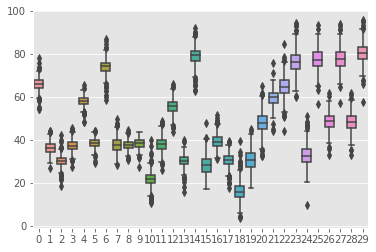

In [156]:
sns.boxplot( data=vald_results)

This is for Laplace Loss

In [125]:
from model1 import FaceKeypointModel
device = torch.device('cpu')
PATH = '/home/nandhini/NandhiniMathivananRnD/outputs/lap_model'
model = FaceKeypointModel()
#print(model)
model.load_state_dict(torch.load(PATH, map_location=device))
model.eval()


FaceKeypointModel(
  (conv1): Conv2d(1, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (resnet18): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias

In [138]:
from model1 import FaceKeypointModel,LaplaceNLLLoss
model = FaceKeypointModel().to(config.DEVICE)
optimizer = optim.Adam(model.parameters(), lr=config.LR)
BATCH_SIZE = 256
LR = 0.0001
EPOCHS = 1
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#train test split
TEST_SPLIT = 0.2
SHOW_DATASET_PLOT = True

In [139]:
import config
def validate(model, dataloader, data, epoch):
    print('Validating')
    model.eval()
    valid_running_loss = []
    Scale = []
    val_difference = []
    
    counter = 0
    # calculate the number of batches
    num_batches = int(len(data)/dataloader.batch_size)
    with torch.no_grad():
        for i, data in tqdm(enumerate(dataloader), total=num_batches):
            counter += 1
            image, keypoints = data['image'].to(config.DEVICE), data['keypoints'].to(config.DEVICE)
            # flatten the keypoints
            keypoints = keypoints.view(keypoints.size(0), -1)
            outputs,scale = model(image)
            loss = LaplaceNLLLoss(outputs, keypoints,scale)
            #valid_running_loss += loss.item()
            valid_running_loss.append(loss.tolist())
            Scale.extend(scale.tolist())
            val_difference.extend(abs(keypoints - outputs).squeeze(1).tolist())
            # plot the predicted validation keypoints after every...
            # ... 25 epochs and from the first batch
            if (epoch+1) % 25 == 0 and i == 0:
                utils.valid_keypoints_plot(image, outputs, keypoints, epoch)
    valid_loss = np.average(valid_running_loss)
    avg_scale  = np.average(Scale)  

    
    
    

    return valid_loss, val_difference




train_loss = []
val_loss = []
finalscale = []
prediction = []
#entropy=[]

for epoch in range(EPOCHS):
    print(f"Epoch {epoch+1} of {EPOCHS}")
#    train_func = fit(model, train_loader, train_data)
 #   train_epoch_loss = train_func
    val_epoch_loss,vald1 = validate(model, valid_loader, valid_data, epoch)
    Val_loss = val_epoch_loss
#    lap_scale = val_epoch_loss[1]
    pred = vald1
#    ent = 0.5*(np.log(2*np.pi*Variance))+1/2
#    train_loss.append(train_epoch_loss)
#    val_loss.append(Val_loss)
#    finalscale.append(lap_scale)
    prediction.append(pred)
#    entropy.append(ent)

#    print(f"Train Loss: {train_epoch_loss:.4f}")
    print(f'Val Loss: {val_epoch_loss:.4f}')
#    print(f'scale: {lap_scale:.4f}')
#    print(f'pred: {pred:.4f}')
new = np.vstack((prediction)).T
np.savetxt("final_laplace.csv", new, delimiter=",")

# In[8]:


# loss plots



# In[ ]:




  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1 of 1
Validating


2it [00:02,  1.06s/it]                       

Val Loss: 1989.1862


In [140]:
val_results = pd.DataFrame(vald1, columns=[str(i) for i in range(30)])

In [141]:
import seaborn as sns

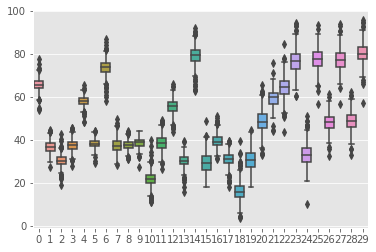

In [137]:
sns.boxplot( data=val_results)